In [ ]:
!unzip /content/dataverse_files.zip -d /content/

Archive:  /content/dataverse_files.zip
  inflating: /content/week_approach_maskedID_timeseries.csv  
  inflating: /content/main.ipynb     
  inflating: /content/day_approach_maskedID_timeseries.csv  
  inflating: /content/README.txt     
  inflating: /content/MANIFEST.TXT   


In [ ]:
import pandas as pd

# Load CSV into DataFrame
data = pd.read_csv('/content/day_approach_maskedID_timeseries.csv')

print(data.keys())  # Display the first few rows


Index(['nr. sessions', 'total km', 'km Z3-4', 'km Z5-T1-T2', 'km sprinting',
       'strength training', 'hours alternative', 'perceived exertion',
       'perceived trainingSuccess', 'perceived recovery', 'nr. sessions.1',
       'total km.1', 'km Z3-4.1', 'km Z5-T1-T2.1', 'km sprinting.1',
       'strength training.1', 'hours alternative.1', 'perceived exertion.1',
       'perceived trainingSuccess.1', 'perceived recovery.1', 'nr. sessions.2',
       'total km.2', 'km Z3-4.2', 'km Z5-T1-T2.2', 'km sprinting.2',
       'strength training.2', 'hours alternative.2', 'perceived exertion.2',
       'perceived trainingSuccess.2', 'perceived recovery.2', 'nr. sessions.3',
       'total km.3', 'km Z3-4.3', 'km Z5-T1-T2.3', 'km sprinting.3',
       'strength training.3', 'hours alternative.3', 'perceived exertion.3',
       'perceived trainingSuccess.3', 'perceived recovery.3', 'nr. sessions.4',
       'total km.4', 'km Z3-4.4', 'km Z5-T1-T2.4', 'km sprinting.4',
       'strength training.4',

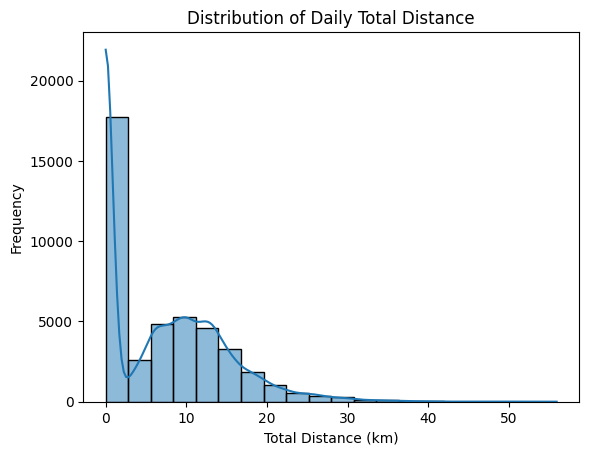

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot distribution of daily total distance
sns.histplot(data['total km'], bins=20, kde=True)
plt.title('Distribution of Daily Total Distance')
plt.xlabel('Total Distance (km)')
plt.ylabel('Frequency')
plt.show()

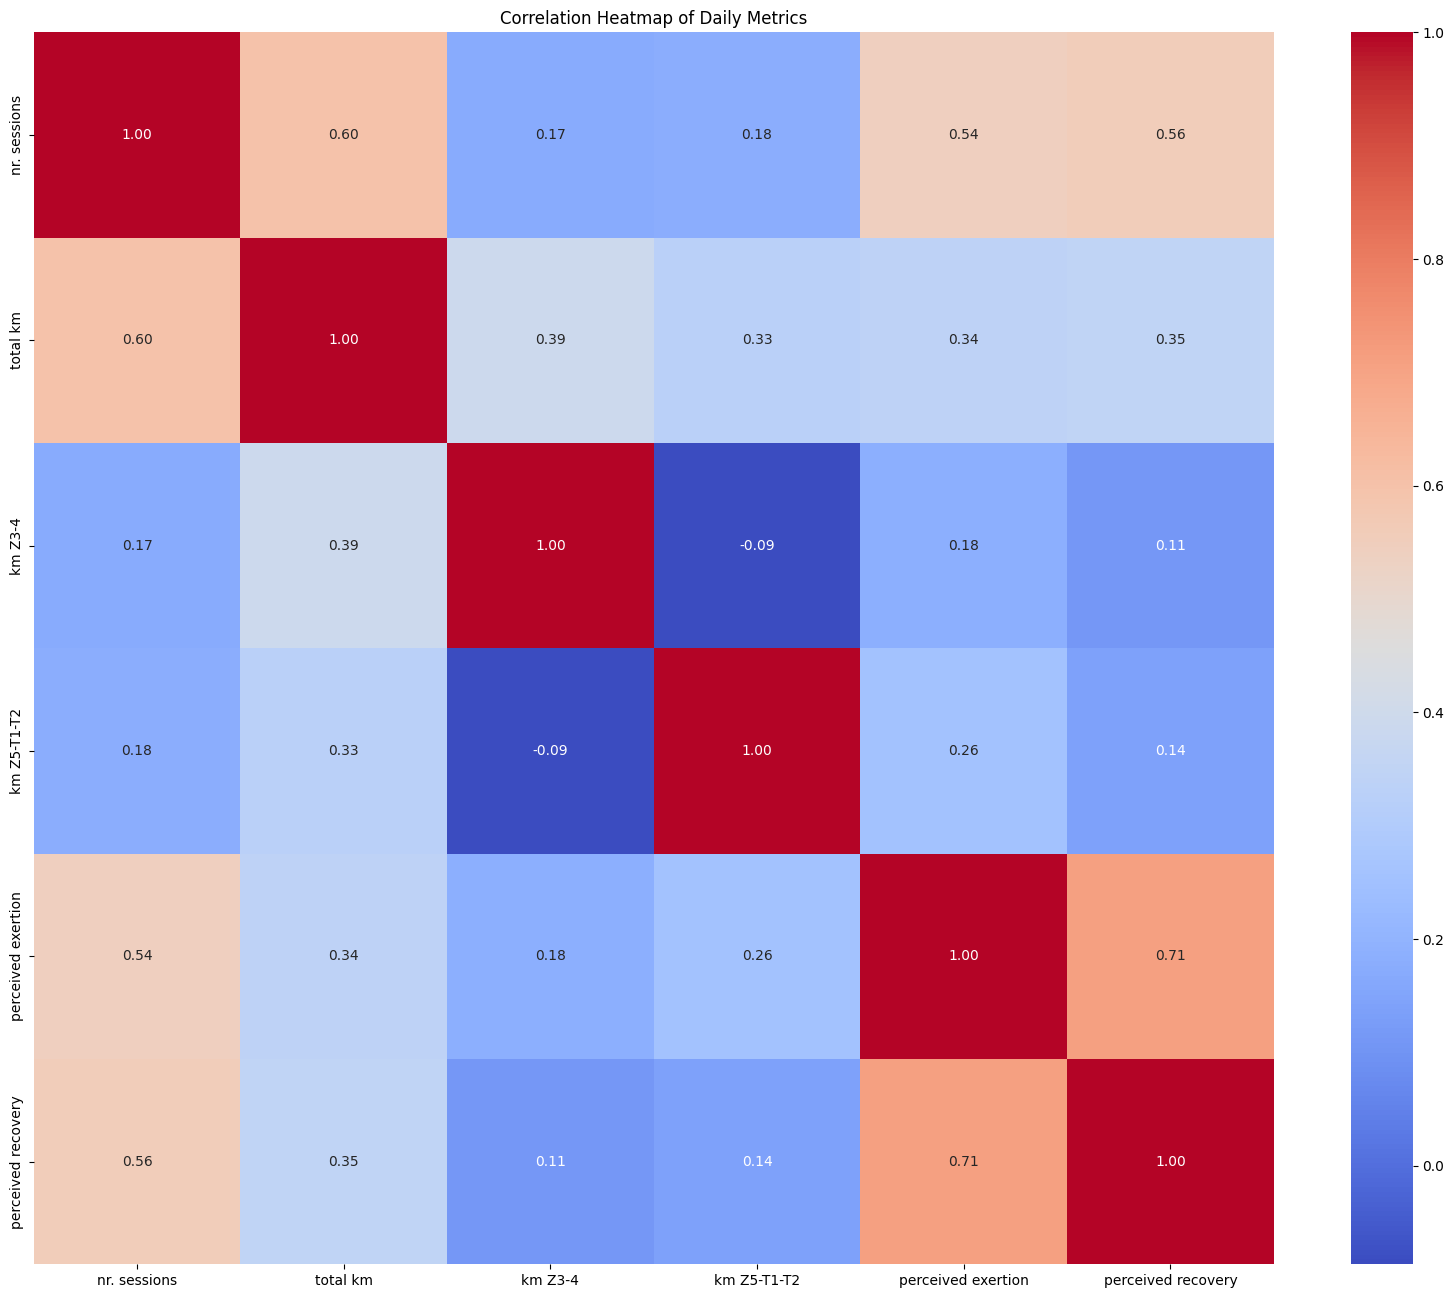

In [ ]:
# Select daily metrics for correlation analysis
daily_metrics = data[['nr. sessions', 'total km', 'km Z3-4', 'km Z5-T1-T2', 'perceived exertion', 'perceived recovery']]

# Compute correlation matrix
corr_matrix = daily_metrics.corr()
plt.figure(figsize=(20, 16))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Daily Metrics')
plt.show()

                        Feature  Pearson Correlation       p-value
7            perceived exertion             0.039748  1.985863e-16
47         perceived exertion.4             0.037525  8.316434e-15
57         perceived exertion.5             0.037154  1.520024e-14
27         perceived exertion.2             0.036932  2.175249e-14
48  perceived trainingSuccess.4             0.034931  4.982319e-13
..                          ...                  ...           ...
46          hours alternative.4            -0.001980  6.822312e-01
12                    km Z3-4.1            -0.003363  4.867709e-01
56          hours alternative.5            -0.006418  1.844203e-01
11                   total km.1            -0.009048  6.133288e-02
6             hours alternative            -0.009111  5.953929e-02

[70 rows x 3 columns]


<ipython-input-14-f4932191ad11>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Pearson Correlation', y='Feature', data=correlation_df, palette='coolwarm')


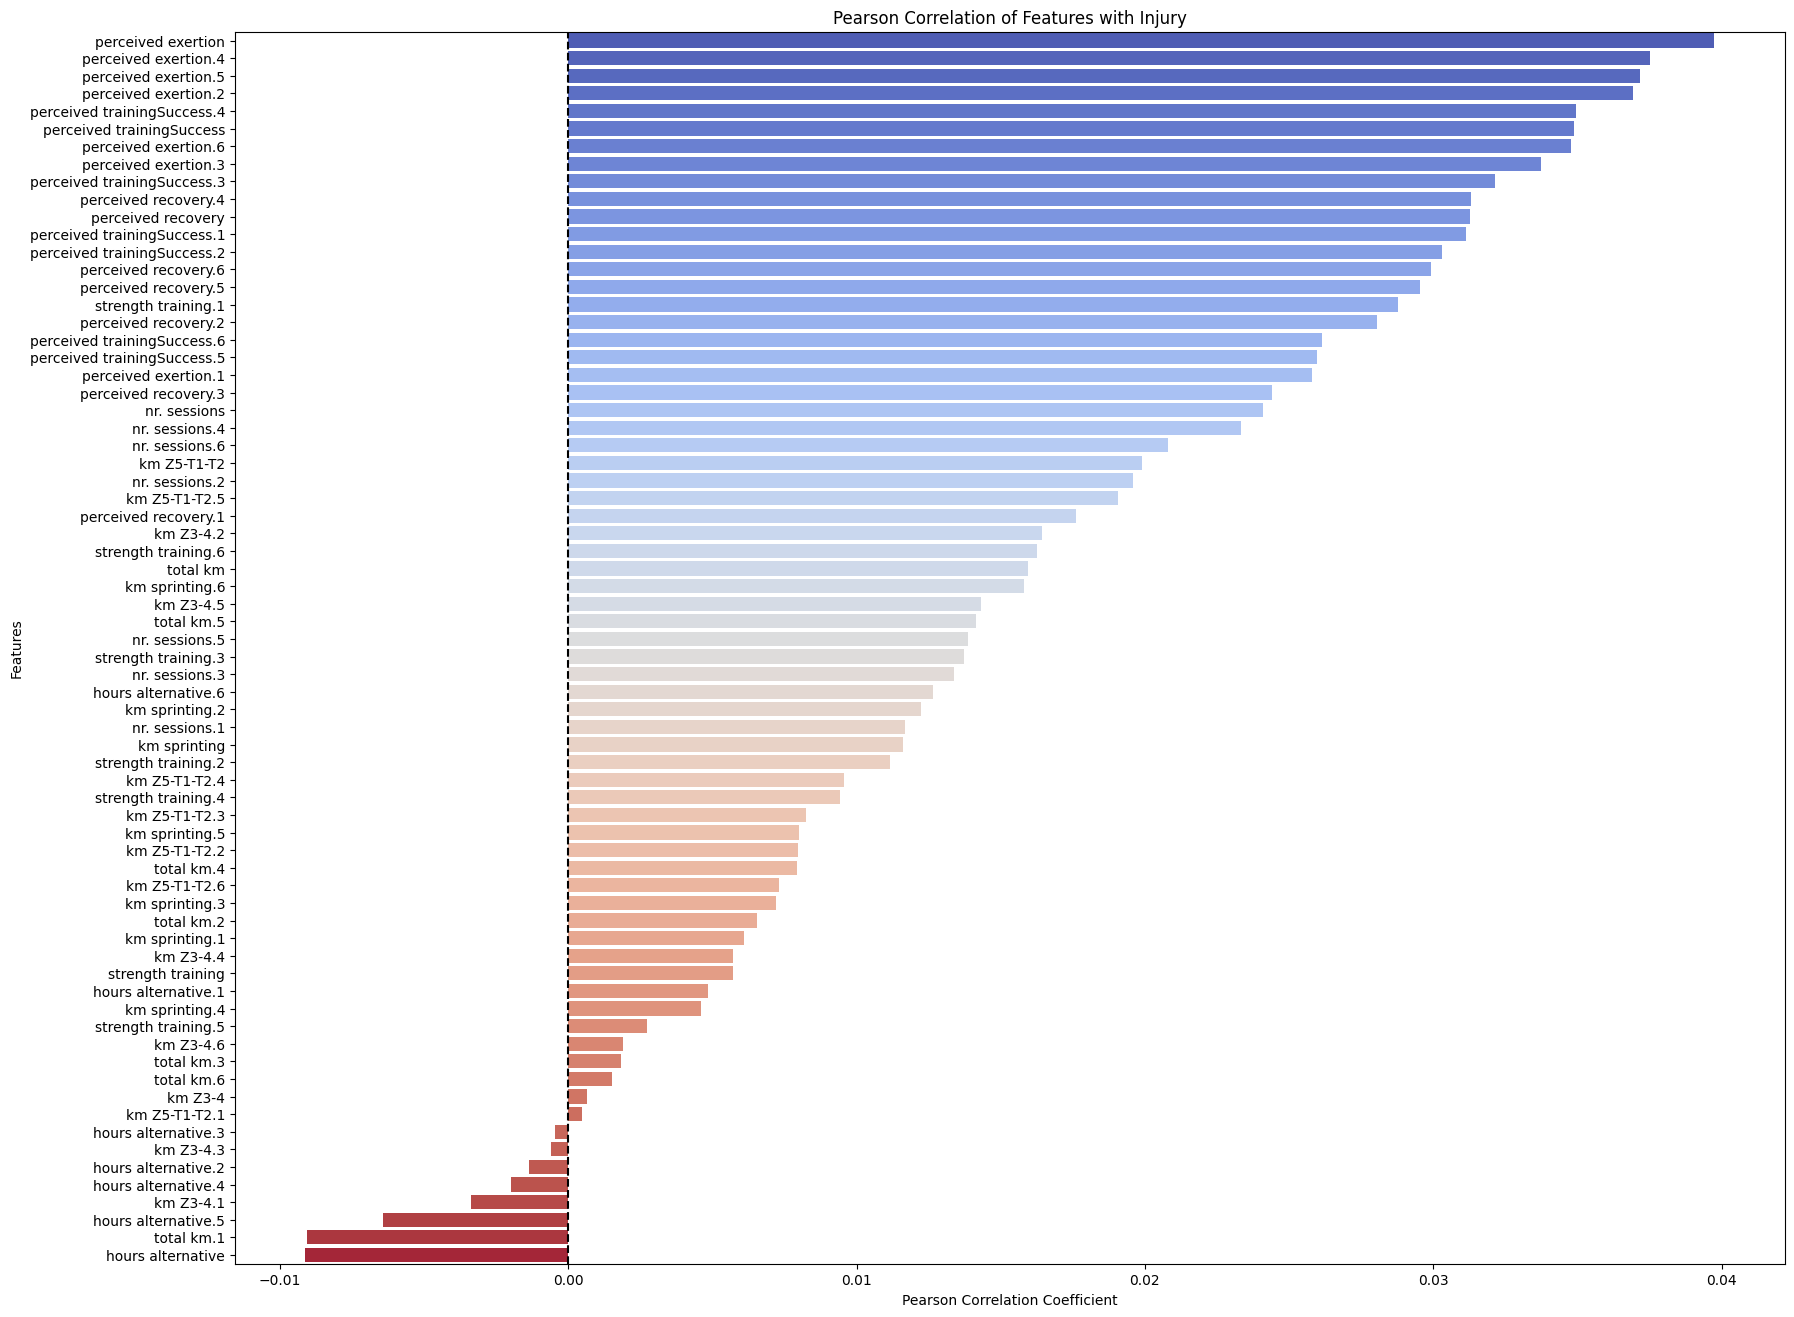

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import pearsonr

# Initialize a dictionary to store correlation coefficients and p-values
correlation_results = {'Feature': [], 'Pearson Correlation': [], 'p-value': []}

# Calculate Pearson correlation for each feature against injury
for feature in data.columns:
    if feature != 'injury' and feature != 'Date' and feature != 'Athlete ID':  # Exclude non-feature columns
        corr, p_value = pearsonr(data[feature], data['injury'])
        correlation_results['Feature'].append(feature)
        correlation_results['Pearson Correlation'].append(corr)
        correlation_results['p-value'].append(p_value)

# Convert results to a DataFrame for better visualization
correlation_df = pd.DataFrame(correlation_results)
correlation_df = correlation_df.sort_values(by='Pearson Correlation', ascending=False)

# Display the results
print(correlation_df)

# Plot Pearson correlation coefficients
plt.figure(figsize=(20, 16))
sns.barplot(x='Pearson Correlation', y='Feature', data=correlation_df, palette='coolwarm')
plt.title('Pearson Correlation of Features with Injury')
plt.xlabel('Pearson Correlation Coefficient')
plt.ylabel('Features')
plt.axvline(0, color='black', linestyle='--')  # Add a vertical line at 0
plt.show()

                        Feature  Pearson Correlation       p-value
7            perceived exertion             0.039748  1.985863e-16
47         perceived exertion.4             0.037525  8.316434e-15
57         perceived exertion.5             0.037154  1.520024e-14
27         perceived exertion.2             0.036932  2.175249e-14
48  perceived trainingSuccess.4             0.034931  4.982319e-13
8     perceived trainingSuccess             0.034880  5.387124e-13
67         perceived exertion.6             0.034781  6.265420e-13
37         perceived exertion.3             0.033723  3.045226e-12
38  perceived trainingSuccess.3             0.032156  2.902468e-11
49         perceived recovery.4             0.031308  9.430359e-11


<ipython-input-9-57c25505a5a3>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Pearson Correlation', y='Feature', data=top_10_df, palette='coolwarm')


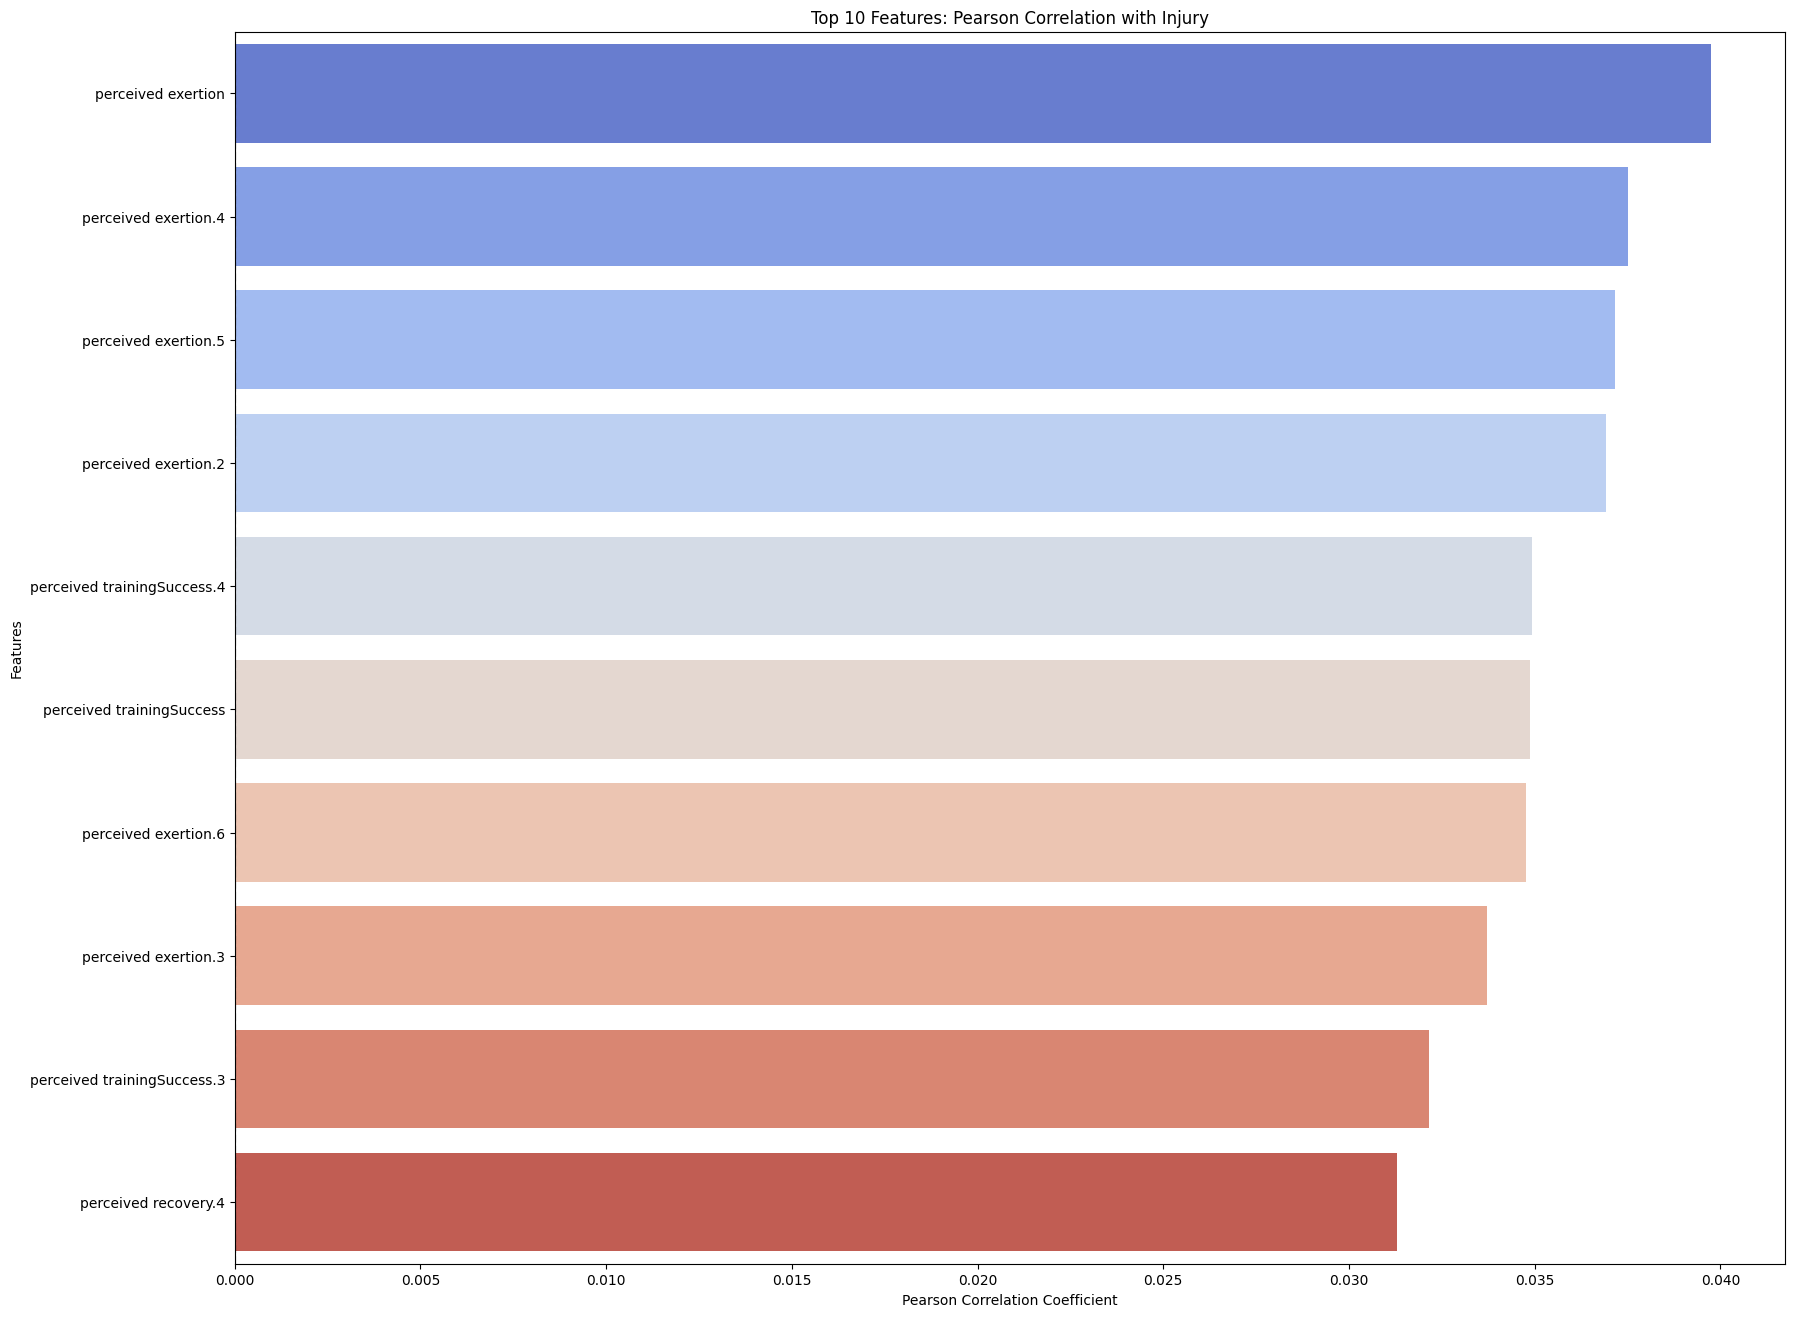

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import pearsonr

# Initialize a dictionary to store correlation coefficients and p-values
correlation_results = {'Feature': [], 'Pearson Correlation': [], 'p-value': []}

# Calculate Pearson correlation for each feature against injury
for feature in data.columns:
    if feature != 'injury' and feature != 'Date' and feature != 'Athlete ID':  # Exclude non-feature columns
        corr, p_value = pearsonr(data[feature], data['injury'])
        correlation_results['Feature'].append(feature)
        correlation_results['Pearson Correlation'].append(corr)
        correlation_results['p-value'].append(p_value)

# Convert results to a DataFrame for better visualization
correlation_df = pd.DataFrame(correlation_results)
correlation_df = correlation_df.sort_values(by='Pearson Correlation', ascending=False)

# Select top 10 features
top_10_df = correlation_df.head(10)

# Display the results
print(top_10_df)

# Plot Pearson correlation coefficients for top 10 features
plt.figure(figsize=(20, 16))
sns.barplot(x='Pearson Correlation', y='Feature', data=top_10_df, palette='coolwarm')
plt.title('Top 10 Features: Pearson Correlation with Injury')
plt.xlabel('Pearson Correlation Coefficient')
plt.ylabel('Features')
plt.axvline(0, color='black', linestyle='--')  # Add a vertical line at 0
plt.show()


<ipython-input-15-1e7902b0b804>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlation_with_injury.values, y=correlation_with_injury.index, palette='coolwarm')


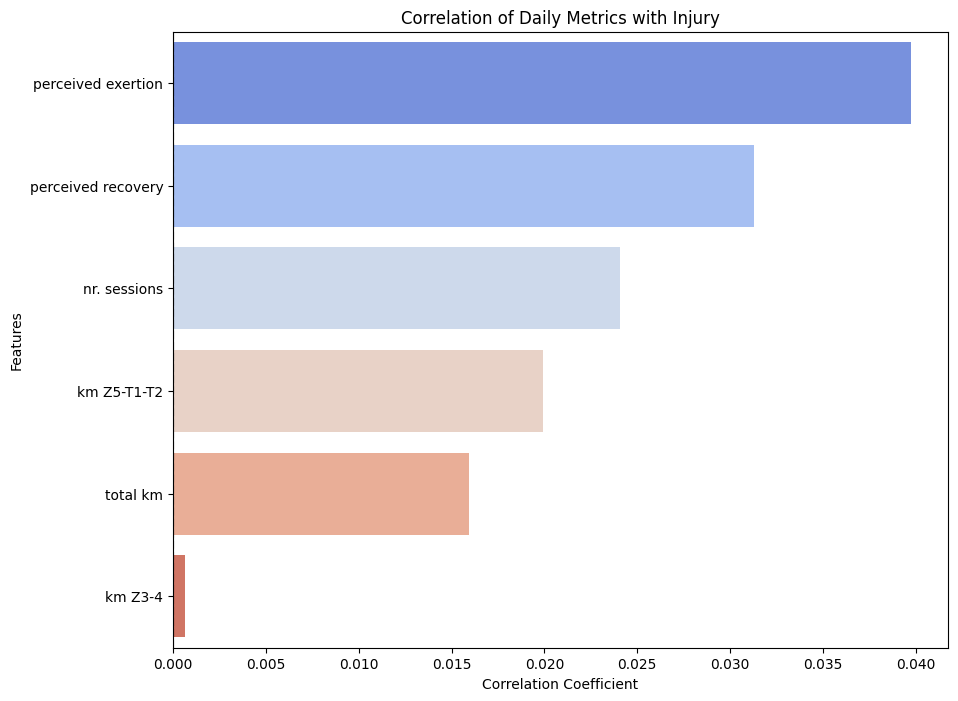

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Select specific columns for correlation
daily_metrics = data[['injury','nr. sessions', 'total km', 'km Z3-4', 'km Z5-T1-T2', 'perceived exertion', 'perceived recovery']]

# Calculate correlation with injury
correlation_with_injury = daily_metrics.corr()['injury'].drop('injury')

# Sort correlations in descending order
correlation_with_injury = correlation_with_injury.sort_values(ascending=False)

# Plot correlation with injury
plt.figure(figsize=(10, 8))
sns.barplot(x=correlation_with_injury.values, y=correlation_with_injury.index, palette='coolwarm')
plt.title('Correlation of Daily Metrics with Injury')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.axvline(0, color='black', linestyle='--')  # Add a vertical line at 0
plt.show()


In [ ]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Prepare data
X = data.drop(columns=['injury', 'Date', 'Athlete ID'])
y = data['injury']

# Train Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X, y)


RandomForestClassifier(random_state=42)

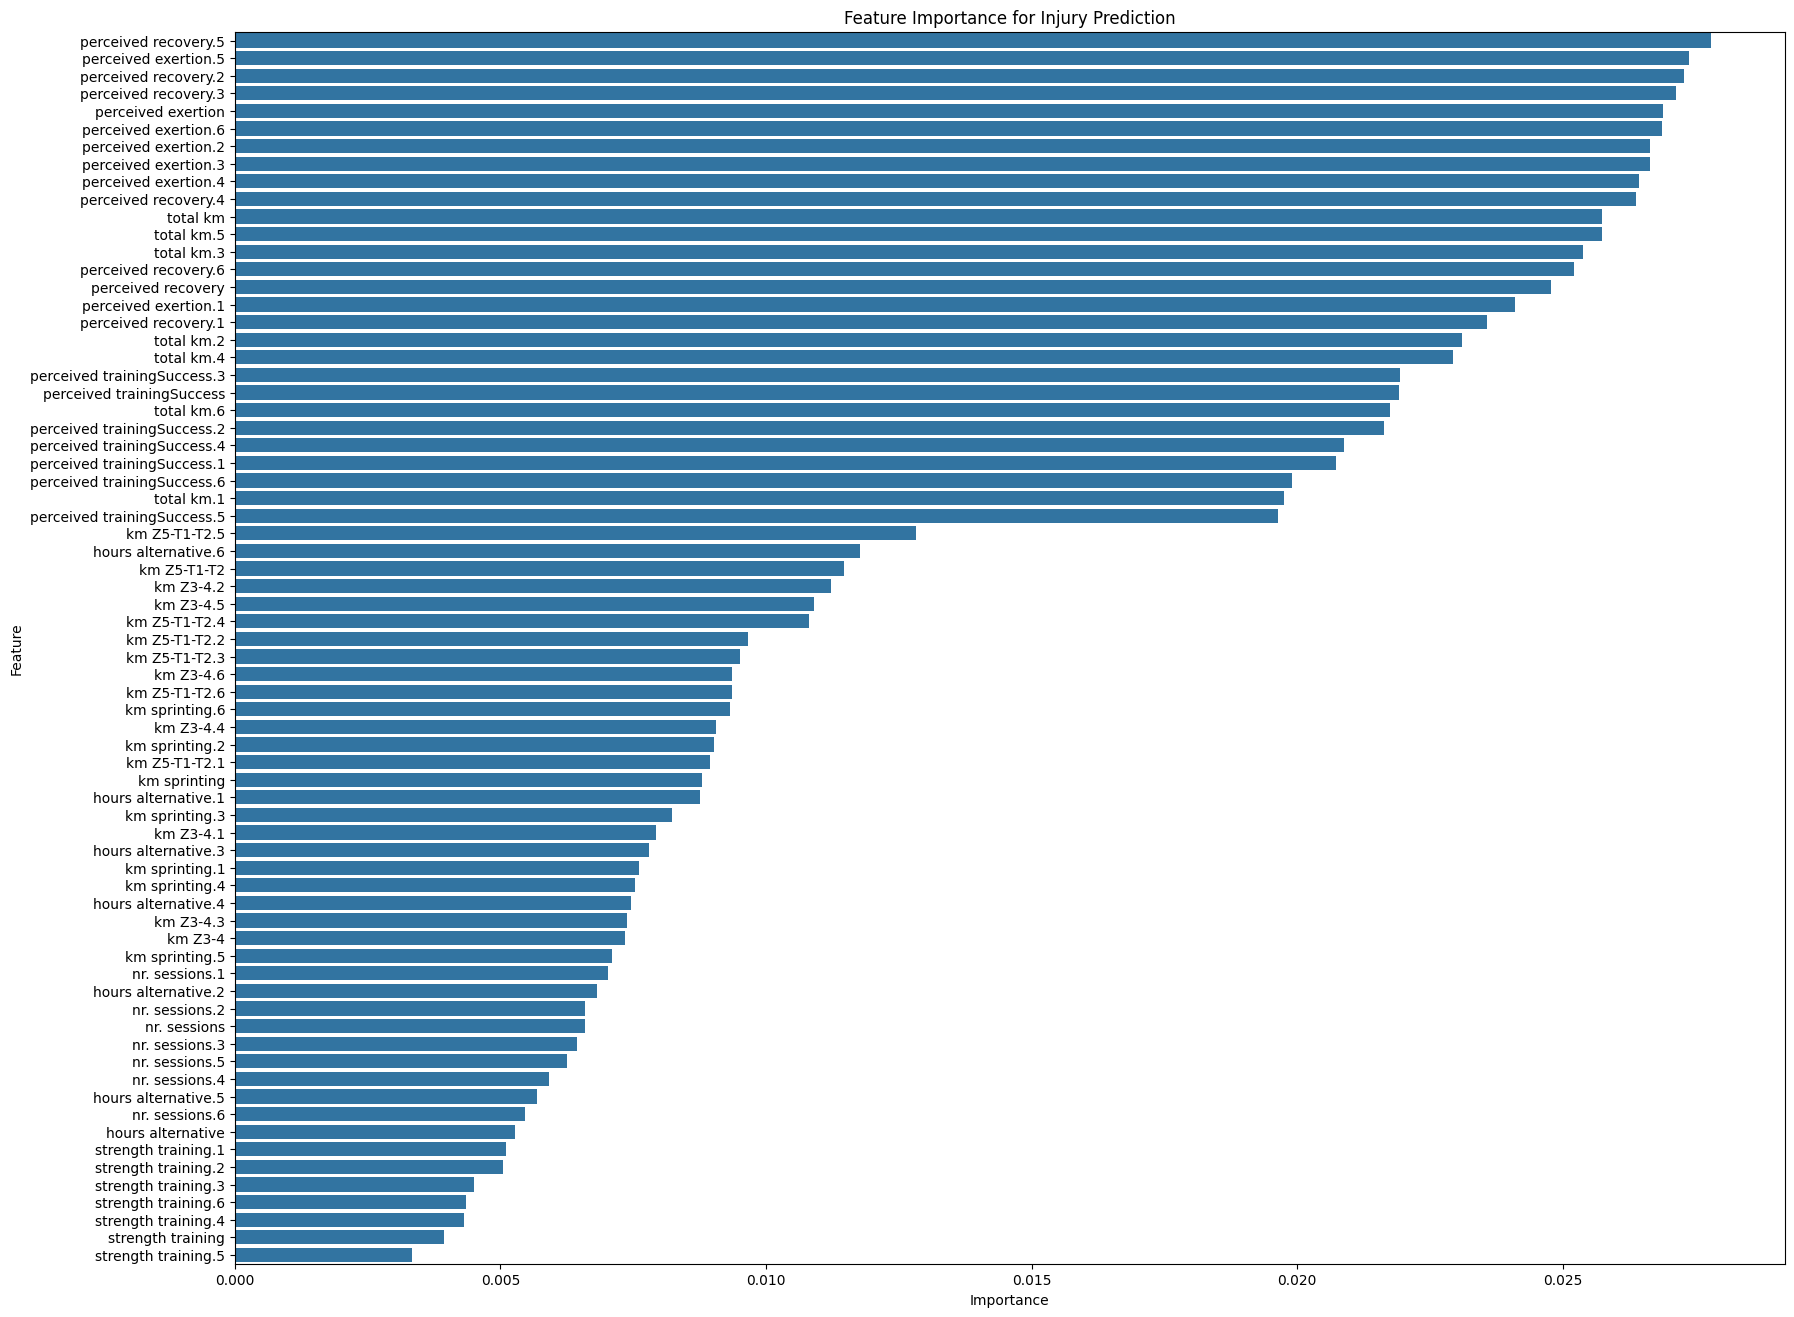

In [ ]:

# Extract feature importance
feature_importance = model.feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance}).sort_values(by='Importance', ascending=False)

# Plot feature importance with increased figure size
plt.figure(figsize=(20, 16))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance for Injury Prediction')
plt.show()

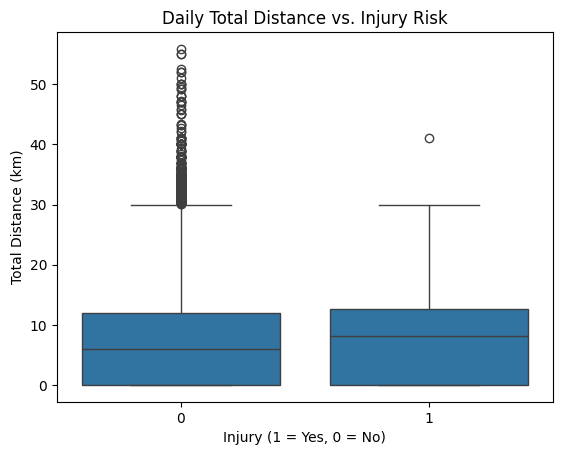

In [ ]:
sns.boxplot(x='injury', y='total km', data=data)
plt.title('Daily Total Distance vs. Injury Risk')
plt.xlabel('Injury (1 = Yes, 0 = No)')
plt.ylabel('Total Distance (km)')
plt.show()

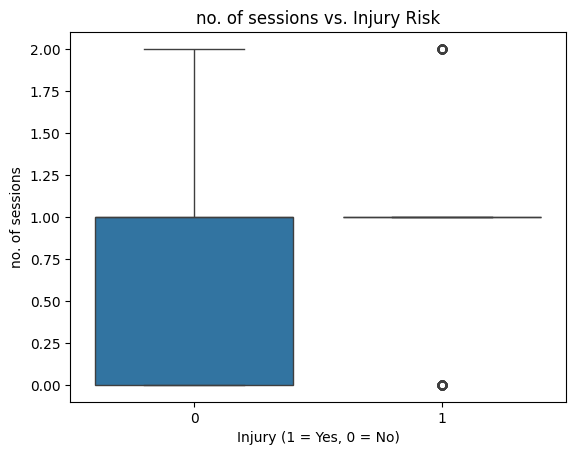

In [ ]:
sns.boxplot(x='injury', y='nr. sessions', data=data)
plt.title('no. of sessions vs. Injury Risk')
plt.xlabel('Injury (1 = Yes, 0 = No)')
plt.ylabel('no. of sessions')
plt.show()

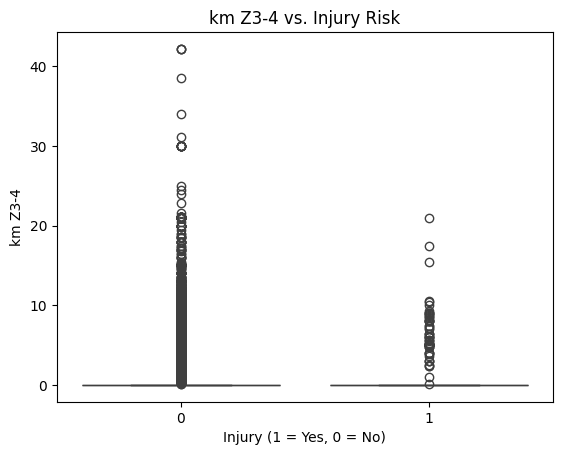

In [ ]:
sns.boxplot(x='injury', y='km Z3-4', data=data)
plt.title('km Z3-4 vs. Injury Risk')
plt.xlabel('Injury (1 = Yes, 0 = No)')
plt.ylabel('km Z3-4')
plt.show()

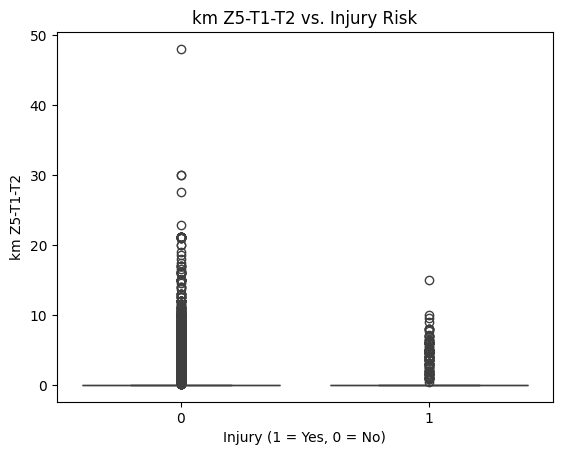

In [ ]:
sns.boxplot(x='injury', y='km Z5-T1-T2', data=data)
plt.title('km Z5-T1-T2 vs. Injury Risk')
plt.xlabel('Injury (1 = Yes, 0 = No)')
plt.ylabel('km Z5-T1-T2')
plt.show()

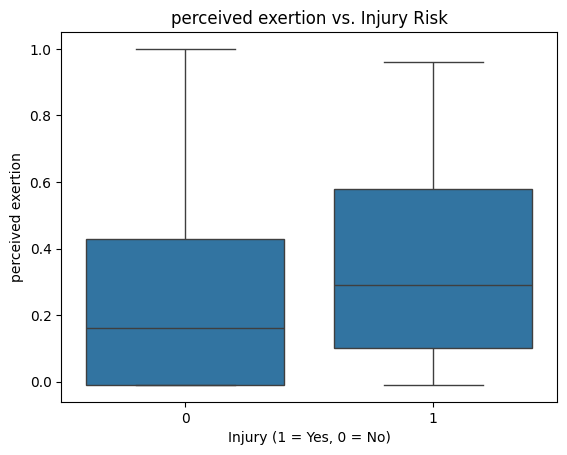

In [ ]:
sns.boxplot(x='injury', y='perceived exertion', data=data)
plt.title('perceived exertion vs. Injury Risk')
plt.xlabel('Injury (1 = Yes, 0 = No)')
plt.ylabel('perceived exertion')
plt.show()

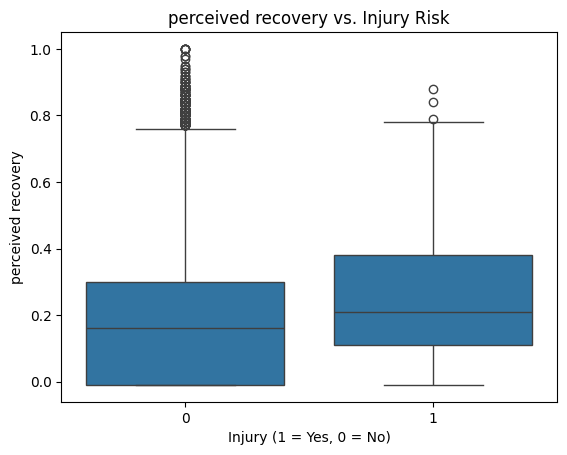

In [ ]:
sns.boxplot(x='injury', y='perceived recovery', data=data)
# plt.figure(figsize=(20, 16))
plt.title('perceived recovery vs. Injury Risk')
plt.xlabel('Injury (1 = Yes, 0 = No)')
plt.ylabel('perceived recovery')
plt.show()

In [ ]:
from scipy.stats import ttest_ind

# Separate data into injured and non-injured groups
injured = data[data['injury'] == 1]
non_injured = data[data['injury'] == 0]

# Perform t-test for each feature
for feature in ['nr. sessions', 'total km', 'km Z3-4', 'km Z5-T1-T2', 'perceived exertion', 'perceived recovery']:
    t_stat, p_value = ttest_ind(injured[feature], non_injured[feature])
    print(f"{feature}: t-statistic = {t_stat}, p-value = {p_value}")

nr. sessions: t-statistic = 4.982709165995362, p-value = 6.294440125241152e-07
total km: t-statistic = 3.2978441128227227, p-value = 0.0009750967029044364
km Z3-4: t-statistic = 0.1371907572207056, p-value = 0.8908806623590321
km Z5-T1-T2: t-statistic = 4.11578694465351, p-value = 3.865833117417656e-05
perceived exertion: t-statistic = 8.22623232855998, p-value = 1.9858628728491744e-16
perceived recovery: t-statistic = 6.471506528942772, p-value = 9.807746577911382e-11
